## Predicting Titanic Survival using Machine Learning

This Notebook looks into various Python-based Machine learning and Data Science libraries in an attempt to build a Machine learning models which predicts whether the passenger will survive or not based on the data attributes provided from Kaggle.

we are going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

 

### 1. Problem Definition:

> On the basis of data we are provided from Kaggle (https://www.kaggle.com/c/titanic/data),we have to build a machine learning model which predicts whether the passenger will surivie or not.

### 2. Data:

Data is provided by the kaggle (https://www.kaggle.com/c/titanic/data).

The data has been split into two groups:
* training set (train.csv):
The training set should be used to build our machine learning models. For the training set,outcome (also known as the “ground  truth”) for each passenger is provided. 

* test set (test.csv):
The test set should be used to see how well our model performs on unseen data. For the test set,ground truth is not provided. It is our job to predict these outcomes. 

**Note:** There is also a file called gender submission, which is an example of what our submission must look like.


### 3.  Evaluation:

The Evaluation metric for this competition is accuracy between the actual and the predicted Survival.

### 4. Features:

Following are the features of our data set:

* Survival: 0 = No, 1 = Yes
* pclass: Ticket class   --> 1 = 1st, 2 = 2nd, 3 = 3rd
* Sex	
* Age in years	
* sibsp    : siblings / spouses aboard the Titanic	
* parch	   : parents / children aboard the Titanic	
* ticket   : Ticket number	
* fare	   : Passenger fare	
* cabin	   : Cabin number	
* embarked : Port of Embarkation  --> C = Cherbourg, Q = Queenstown, S = Southampton


#### Importing necessary tools:



In [1108]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Import required models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from catboost import CatBoostClassifier, Pool

from sklearn import model_selection,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

%matplotlib inline
warnings.filterwarnings('ignore')

# Reading files
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')
gender_submission = pd.read_csv('titanic/gender_submission.csv')

In [1109]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1110]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


> So we noticed that the test data doesn't have ground truth as given in kaggle data description.

In [1111]:
test.shape

(418, 11)

In [1112]:
gender_submission.head()           # This is how our response for kaggle should look like

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [1113]:
train.shape,test.shape

((891, 12), (418, 11))

### Exploratory data Analysis

**Survival: 0 = No, 1 = Yes**

In [1114]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1115]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [1116]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [1117]:
pd.crosstab(train.Sex,train.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


In [1118]:
109/(468+109)

0.18890814558058924

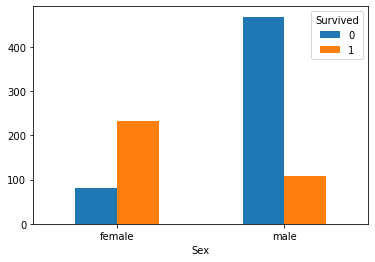

In [1119]:
pd.crosstab(train.Sex,train.Survived).plot(kind='bar');
plt.xticks(rotation=0);

It can be clearly seen that chances of Male survival are very less compared to Female.
**Almost 75% of the females survied the titanic compared to 19% of male survival rate**

In [1120]:
# missing values 
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So, **Age** and **Cabin** have most missing values.
**Embarked** have two missing values

Let's first explore **Age** and **Cabin** data.

In [1121]:
train.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [1122]:
train.Age.min(),train.Age.max()

(0.42, 80.0)

In [1123]:
pd.crosstab(train.Survived,train.Age).T

Survived,0,1
Age,,
0.42,0,1
0.67,0,1
0.75,0,2
0.83,0,2
0.92,0,1
...,...,...
70.00,2,0
70.50,1,0
71.00,2,0


In [1124]:
train['Age'].mean() , train['Age'].median()

(29.69911764705882, 28.0)

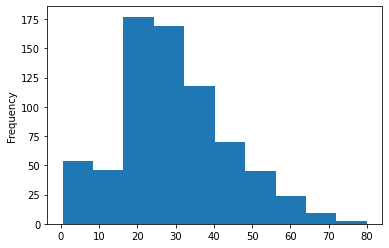

In [1125]:
train.Age.plot(kind='hist')

As we know median is more robust than mean. we'll use median value of Age to fill our missing age values. 

In [1126]:
train.Age.dtypes

dtype('float64')

In [1127]:
# Let's explore Cabin
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
C22 C26        3
F2             3
              ..
D46            1
C110           1
B101           1
E58            1
E49            1
Name: Cabin, Length: 147, dtype: int64

In [1128]:
train.Cabin.dtype

dtype('O')

In [1129]:
pd.crosstab(train.Cabin,train.Survived)

Survived,0,1
Cabin,,
A10,1,0
A14,1,0
A16,0,1
A19,1,0
A20,0,1
...,...,...
F33,0,3
F38,1,0
F4,0,2


In [1130]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1131]:
train.shape

(891, 12)

In [1132]:
697/891

0.7822671156004489

 Since almost 80% of values of Cabin are missing. let's ignore the column for now and **delete it from both train and test data frame**.

In [1133]:
train = train.drop("Cabin",axis=1)
test  = test.drop('Cabin',axis=1)

In [1134]:
train.shape,test.shape

((891, 11), (418, 10))

Let's check Emabarked Column

In [1135]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

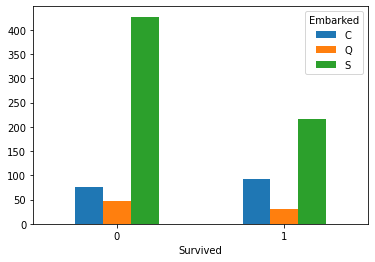

In [1136]:
pd.crosstab(train.Survived,train.Embarked).plot(kind='bar')
plt.xticks(rotation=0);

In [1137]:
pd.crosstab(train.Survived,train.Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


**C = Cherbourg, Q = Queenstown, S = Southampton**
From the data we can see that:
* Emabarked is a categorical data
* If a Person is Emabarked at S, chances of survival are least followed by Q and C.

We can deal with missing values of Embarked Column by:
* Putting 'missing'
* Removing the row completely.

**Note:** But before filling it with missing we have to check whether the test data has missing Embarked values or not. If not it's better to remove the rows completely or train and test data shape will not match as needed.

In [1138]:
# Checking if test data has missing emarked values 
test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

As there are no missing values in Embarked Column of test data. Let's remove the missing rows of Embarked column from traindata.


In [1139]:
train.shape

(891, 11)

In [1140]:
train.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [1141]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [1142]:
train = train.dropna(subset=['Embarked'])
train.shape

(889, 11)

In [1143]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

### Name

In [1144]:
train.Name.value_counts()

Cairns, Mr. Alexander                                  1
Homer, Mr. Harry ("Mr E Haven")                        1
Touma, Mrs. Darwis (Hanne Youssef Razi)                1
Hamalainen, Master. Viljo                              1
Fry, Mr. Richard                                       1
                                                      ..
Williams, Mr. Leslie                                   1
Henry, Miss. Delia                                     1
Holverson, Mrs. Alexander Oskar (Mary Aline Towner)    1
Harris, Mr. George                                     1
Romaine, Mr. Charles Hallace ("Mr C Rolmane")          1
Name: Name, Length: 889, dtype: int64

All the Name data is there and different. But we can see Every name has Miss,Mr etc associated with it. We can use this data for feature engineering and create a categorical Column out of it. 

### pclass
Ticket class --> 1 = 1st, 2 = 2nd, 3 = 3rd

In [1145]:
train.Pclass.value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [1146]:
pd.crosstab(train.Pclass,train.Survived)

Survived,0,1
Pclass,,
1,80,134
2,97,87
3,372,119


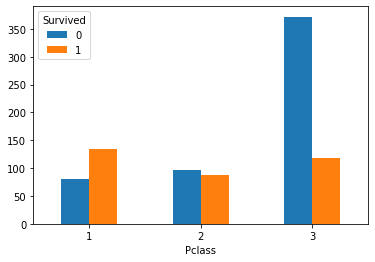

In [1147]:
pd.crosstab(train.Pclass,train.Survived).plot(kind='bar')
plt.xticks(rotation=0);

It can be clearly observed that:

* It's a categorical data.
* If one is travelling in 3rd class, his/her chances of survival are very less.
* Chances of survival are maximum in 1st class.

In [1148]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Survived
>Survival: 0 = No, 1 = Yes

In [1149]:
train.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

### SibSp
>siblings / spouses aboard the Titanic	

In [1150]:
train.SibSp.value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [1151]:
pd.crosstab(train.SibSp,train.Survived)

Survived,0,1
SibSp,,
0,398,208
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


## Parch:
> parents / children aboard the Titanic

In [1152]:
train.Parch.value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [1153]:
pd.crosstab(train.Parch,train.Survived)

Survived,0,1
Parch,,
0,445,231
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


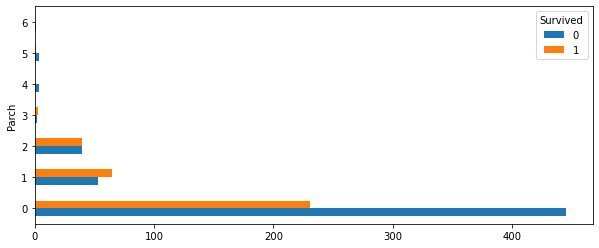

In [1154]:
pd.crosstab(train.Parch,train.Survived).plot(kind='barh',figsize=(10,4));

In [1155]:
train.Ticket.value_counts()

1601        7
CA. 2343    7
347082      7
347088      6
3101295     6
           ..
315082      1
28206       1
3101276     1
349204      1
PC 17609    1
Name: Ticket, Length: 680, dtype: int64

In [1156]:
train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
7.8000      1
13.8583     1
7.6292      1
15.0500     1
8.6833      1
Name: Fare, Length: 247, dtype: int64

In [1157]:
test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [1158]:
test.shape

(418, 10)

In [1159]:
test['Fare'] = test.Fare.fillna(test.Fare.median())
test.shape

(418, 10)

In [1160]:
test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

## Conclusion: 

### Sex:
* Categorical data.
* 75% of Females survived Titanic as compared to only 19% of Males.

### Embarked:
* Categorical data.
* C = Cherbourg, Q = Queenstown, S = Southampton.
* Embarked Data is categorical and if a Person is Emabarked at S, chances of survival are least followed by Q and C.      

### Age:
* Median Age is 28.
**we are yet to fill missing Age data with median of Age**.

### Name:
* All the **Name** data is there and all the names are different. 
*  we can see Every name has Miss,Mr etc associated with it. We can use this data   for feature engineering and **create a categorical Column** out of it.

### Passengerid:
* Passengerid has nothing do with Survival.

### Pclass :
* It's a categorical data.
* If one is travelling in 3rd class, his/her chances of survival are very less.
* Chances of survival are maximum in 1st class.

### Survived:
* Although more people died,dataset is a balanced data set. 

### SibSp:
* Categorical Data
* Maximum numbers belong to group with SibSp count 0. 
* One with SibSp count of 1 & 2 have maximum rate of survival.
* When SibSp count goes more than 4, chances of survival goes to nil.

### Parch:
* Categorical Data
* Maximum numbers belong to group with Parch count 0. 
* One with Parch count of 1,2 and 3 have maximum rate of survival.

### Ticket:
* Ticket data does'nt seems to be much helpful.
* As we have Pclass itself, that's enough.
**So, we can also remove Ticket Column from both Train and test data**

### Fare:
* Keep fare data as it is.




## Getting our data ready to be used with machine learning

three main things we have to do:

1. Split the data into features and labels.
2. Filling(also called imputing) or disrerarding the missing values.
3. Converting non numerical values to numerical values (also called feature encoding).

### Filling Missing Age Data (with median age):

In [1161]:
train['Age'] = train.Age.fillna(train.Age.median())
test['Age']  = test.Age.fillna(test.Age.median())
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [1162]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

> We have no missing data now.

In [1163]:
train.shape,test.shape

((889, 11), (418, 10))

In [1164]:
# Let's remove Ticket column from training data
train.drop('Ticket',axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [1165]:
# let's remove Ticket column from testing data.
test.drop('Ticket',axis=1,inplace=True)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


### Feature Engineering:
Let's work on getting our feature column with title of Names.

1. We have to break names after the comma(,).
2. Title which is coming after the comma will be saved as an entry to that row for the title column.

In [1166]:
train['Name'] = train['Name'].astype('str')
train.Name.dtype

dtype('O')

In [1167]:
namess='Wilkes, Mrs. James (Ellen Needs)' 
namess.split(',')

['Wilkes', ' Mrs. James (Ellen Needs)']

In [1168]:
namess.split(',')[1].split()[0]

'Mrs.'

In [1169]:
# Creating a new column and categorising the name data
train['Title'] = [names.split(',')[1].split()[0] for names in train.Name]
test['Title'] = [names.split(',')[1].split()[0] for names in test.Name]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr.


In [1170]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr.
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs.


In [1171]:
train.shape,test.shape

((889, 11), (418, 10))

In [1172]:
train.Title.value_counts()

Mr.          517
Miss.        181
Mrs.         124
Master.       40
Dr.            7
Rev.           6
Col.           2
Major.         2
Mlle.          2
Jonkheer.      1
Lady.          1
the            1
Ms.            1
Don.           1
Mme.           1
Sir.           1
Capt.          1
Name: Title, dtype: int64

In [1173]:
train = train.drop('Name',axis=1)
test = test.drop('Name',axis=1)
train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr.
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,3,1,3,female,26.0,0,0,7.9250,S,Miss.
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,5,0,3,male,35.0,0,0,8.0500,S,Mr.


In [1174]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,Mr.
1,893,3,female,47.0,1,0,7.0000,S,Mrs.
2,894,2,male,62.0,0,0,9.6875,Q,Mr.
3,895,3,male,27.0,0,0,8.6625,S,Mr.
4,896,3,female,22.0,1,1,12.2875,S,Mrs.


In [1175]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

In [1176]:
test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

In [1177]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Title           object
dtype: object

In [1178]:
test.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Title           object
dtype: object

## Turning data into Numbers:

Since all the missing data have been filled and the required categories have been made. So, let's make our data Numerical.

In [1179]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr.
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,3,1,3,female,26.0,0,0,7.9250,S,Miss.
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,5,0,3,male,35.0,0,0,8.0500,S,Mr.


In [1180]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr.
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,3,1,3,female,26.0,0,0,7.9250,S,Miss.
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,5,0,3,male,35.0,0,0,8.0500,S,Mr.


In [1181]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,Mr.
1,893,3,female,47.0,1,0,7.0000,S,Mrs.
2,894,2,male,62.0,0,0,9.6875,Q,Mr.
3,895,3,male,27.0,0,0,8.6625,S,Mr.
4,896,3,female,22.0,1,1,12.2875,S,Mrs.


In [1182]:
test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

In [1183]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Title'],
      dtype='object')

In [1184]:
survived = train.Survived
survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [1185]:
test = pd.get_dummies(test[test.columns])
test.head().T


,0,1,2,3,4
PassengerId,892.0000,893.0,894.0000,895.0000,896.0000
Pclass,3.0000,3.0,2.0000,3.0000,3.0000
Age,34.5000,47.0,62.0000,27.0000,22.0000
SibSp,0.0000,1.0,0.0000,0.0000,1.0000
Parch,0.0000,0.0,0.0000,0.0000,1.0000
Fare,7.8292,7.0,9.6875,8.6625,12.2875
Sex_female,0.0000,1.0,0.0000,0.0000,1.0000
Sex_male,1.0000,0.0,1.0000,1.0000,0.0000
Embarked_C,0.0000,0.0,0.0000,0.0000,0.0000
Embarked_Q,1.0000,0.0,1.0000,0.0000,0.0000


In [1186]:
test.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Col.',
       'Title_Dona.', 'Title_Dr.', 'Title_Master.', 'Title_Miss.', 'Title_Mr.',
       'Title_Mrs.', 'Title_Ms.', 'Title_Rev.'],
      dtype='object')

In [1187]:
test.shape

(418, 20)

In [1188]:
test = test.drop('Title_Dona.',axis=1)
test.shape

(418, 19)

In [1194]:
columns = test.columns

In [1189]:
train.shape

(889, 10)

In [1197]:
train = pd.get_dummies(train[train.columns])
train.head().T


,0,1,2,3,4
PassengerId,1.00,2.0000,3.000,4.0,5.00
Survived,0.00,1.0000,1.000,1.0,0.00
Pclass,3.00,1.0000,3.000,1.0,3.00
Age,22.00,38.0000,26.000,35.0,35.00
SibSp,1.00,1.0000,0.000,1.0,0.00
Parch,0.00,0.0000,0.000,0.0,0.00
Fare,7.25,71.2833,7.925,53.1,8.05
Sex_female,0.00,1.0000,1.000,1.0,0.00
Sex_male,1.00,0.0000,0.000,0.0,1.00
Embarked_C,0.00,1.0000,0.000,0.0,0.00


In [1198]:
train = pd.get_dummies(train[test.columns])

In [1199]:
train['Survived'] = survived
train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Col.,Title_Dr.,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Ms.,Title_Rev.,Survived
0,1,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,0,0,1,0,0,0,0
1,2,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,3,3,26.0,0,0,7.9250,1,0,0,0,1,0,0,0,1,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,1,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,0,0,1,0,0,0,0


In [1200]:
train.shape

(889, 20)

In [937]:
test.shape

(418, 19)

We have turned our data into Numeric. Now:
* We have to split the data.
* After splitting the data, put 'X_train.columns' for testing data columns and genrate a new DataFrame.
* Above step is taken to put the data into same format on which our model will be trained.
* Create a function which fits data and evaluate data on terms of accuracy(asked by Kaggle).
* Try various models.

In [1206]:
# Splitting the data
X = train.drop('Survived',axis=1)
y = train['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Making a fuction which fits and evaluates machine learning models

models = {'Knn'                 : KNeighborsClassifier(),
          'Linear Regression'   : LinearRegression(),
          'Random Forest'       : RandomForestClassifier(),
          'Cat Boost'           : CatBoostClassifier()}

def fit_train_model(models,X_train,X_test,y_train,y_test):
    '''
    Fits and evaluates machine learning models:
    models = Dict of models
    X_test = testing data(no labels)
    y_train = training data(labels)
    y_test = testing_data(labels)
    '''
    np.random.seed(42)
    model_scores = {}
    
    
    for names,models in models.items():
        models.fit(X_train,y_train)
        model_scores[names] = models.score(X_test,y_test)
        
    return model_scores
    

In [1207]:
model_scores = fit_train_model(models,X_train,X_test,y_train,y_test)

Learning rate set to 0.008906
0:	learn: 0.6873789	total: 14.2ms	remaining: 14.2s
1:	learn: 0.6832510	total: 25.6ms	remaining: 12.8s
2:	learn: 0.6783060	total: 33.2ms	remaining: 11s
3:	learn: 0.6732032	total: 38.6ms	remaining: 9.62s
4:	learn: 0.6682110	total: 43.7ms	remaining: 8.7s
5:	learn: 0.6631026	total: 48.7ms	remaining: 8.06s
6:	learn: 0.6582486	total: 52.1ms	remaining: 7.4s
7:	learn: 0.6530881	total: 57.8ms	remaining: 7.17s
8:	learn: 0.6476291	total: 63ms	remaining: 6.93s
9:	learn: 0.6435169	total: 66.7ms	remaining: 6.6s
10:	learn: 0.6391396	total: 72.2ms	remaining: 6.49s
11:	learn: 0.6364629	total: 76.6ms	remaining: 6.3s
12:	learn: 0.6329958	total: 79.8ms	remaining: 6.06s
13:	learn: 0.6282661	total: 85ms	remaining: 5.98s
14:	learn: 0.6239426	total: 90ms	remaining: 5.91s
15:	learn: 0.6202661	total: 95ms	remaining: 5.84s
16:	learn: 0.6157611	total: 100ms	remaining: 5.78s
17:	learn: 0.6121269	total: 106ms	remaining: 5.77s
18:	learn: 0.6081975	total: 111ms	remaining: 5.73s
19:	learn

185:	learn: 0.3927874	total: 1.1s	remaining: 4.81s
186:	learn: 0.3923098	total: 1.1s	remaining: 4.8s
187:	learn: 0.3920580	total: 1.11s	remaining: 4.79s
188:	learn: 0.3917336	total: 1.11s	remaining: 4.78s
189:	learn: 0.3912534	total: 1.12s	remaining: 4.78s
190:	learn: 0.3908620	total: 1.13s	remaining: 4.77s
191:	learn: 0.3902429	total: 1.13s	remaining: 4.76s
192:	learn: 0.3899433	total: 1.14s	remaining: 4.75s
193:	learn: 0.3892167	total: 1.14s	remaining: 4.74s
194:	learn: 0.3885903	total: 1.15s	remaining: 4.73s
195:	learn: 0.3882522	total: 1.15s	remaining: 4.72s
196:	learn: 0.3878968	total: 1.16s	remaining: 4.71s
197:	learn: 0.3876626	total: 1.16s	remaining: 4.7s
198:	learn: 0.3872602	total: 1.17s	remaining: 4.69s
199:	learn: 0.3870292	total: 1.17s	remaining: 4.68s
200:	learn: 0.3865754	total: 1.18s	remaining: 4.68s
201:	learn: 0.3863590	total: 1.18s	remaining: 4.66s
202:	learn: 0.3858277	total: 1.19s	remaining: 4.65s
203:	learn: 0.3856595	total: 1.19s	remaining: 4.64s
204:	learn: 0.38

355:	learn: 0.3485095	total: 2.05s	remaining: 3.71s
356:	learn: 0.3484283	total: 2.05s	remaining: 3.7s
357:	learn: 0.3483828	total: 2.06s	remaining: 3.69s
358:	learn: 0.3482639	total: 2.06s	remaining: 3.69s
359:	learn: 0.3480821	total: 2.07s	remaining: 3.68s
360:	learn: 0.3480290	total: 2.08s	remaining: 3.67s
361:	learn: 0.3478696	total: 2.08s	remaining: 3.67s
362:	learn: 0.3477109	total: 2.09s	remaining: 3.66s
363:	learn: 0.3474448	total: 2.09s	remaining: 3.65s
364:	learn: 0.3473189	total: 2.1s	remaining: 3.65s
365:	learn: 0.3471893	total: 2.1s	remaining: 3.64s
366:	learn: 0.3470490	total: 2.11s	remaining: 3.64s
367:	learn: 0.3468694	total: 2.11s	remaining: 3.63s
368:	learn: 0.3466520	total: 2.12s	remaining: 3.62s
369:	learn: 0.3464438	total: 2.12s	remaining: 3.62s
370:	learn: 0.3463385	total: 2.13s	remaining: 3.61s
371:	learn: 0.3461772	total: 2.13s	remaining: 3.6s
372:	learn: 0.3461007	total: 2.14s	remaining: 3.6s
373:	learn: 0.3459723	total: 2.14s	remaining: 3.59s
374:	learn: 0.345

532:	learn: 0.3217614	total: 3s	remaining: 2.63s
533:	learn: 0.3217215	total: 3.01s	remaining: 2.63s
534:	learn: 0.3215100	total: 3.02s	remaining: 2.63s
535:	learn: 0.3214125	total: 3.03s	remaining: 2.62s
536:	learn: 0.3212619	total: 3.03s	remaining: 2.61s
537:	learn: 0.3210811	total: 3.04s	remaining: 2.61s
538:	learn: 0.3210253	total: 3.04s	remaining: 2.6s
539:	learn: 0.3209819	total: 3.05s	remaining: 2.6s
540:	learn: 0.3208892	total: 3.06s	remaining: 2.59s
541:	learn: 0.3207202	total: 3.06s	remaining: 2.59s
542:	learn: 0.3204162	total: 3.07s	remaining: 2.58s
543:	learn: 0.3202474	total: 3.07s	remaining: 2.57s
544:	learn: 0.3201592	total: 3.08s	remaining: 2.57s
545:	learn: 0.3200183	total: 3.08s	remaining: 2.56s
546:	learn: 0.3198473	total: 3.09s	remaining: 2.56s
547:	learn: 0.3197747	total: 3.09s	remaining: 2.55s
548:	learn: 0.3196559	total: 3.1s	remaining: 2.54s
549:	learn: 0.3195206	total: 3.1s	remaining: 2.54s
550:	learn: 0.3193841	total: 3.11s	remaining: 2.53s
551:	learn: 0.31928

699:	learn: 0.2983320	total: 3.94s	remaining: 1.69s
700:	learn: 0.2980558	total: 3.95s	remaining: 1.68s
701:	learn: 0.2979523	total: 3.97s	remaining: 1.69s
702:	learn: 0.2979319	total: 3.98s	remaining: 1.68s
703:	learn: 0.2977846	total: 3.99s	remaining: 1.68s
704:	learn: 0.2976300	total: 4s	remaining: 1.67s
705:	learn: 0.2973543	total: 4s	remaining: 1.67s
706:	learn: 0.2972615	total: 4.02s	remaining: 1.67s
707:	learn: 0.2971200	total: 4.02s	remaining: 1.66s
708:	learn: 0.2967838	total: 4.03s	remaining: 1.65s
709:	learn: 0.2966074	total: 4.04s	remaining: 1.65s
710:	learn: 0.2964959	total: 4.04s	remaining: 1.64s
711:	learn: 0.2963157	total: 4.06s	remaining: 1.64s
712:	learn: 0.2961623	total: 4.07s	remaining: 1.64s
713:	learn: 0.2959813	total: 4.07s	remaining: 1.63s
714:	learn: 0.2958104	total: 4.08s	remaining: 1.63s
715:	learn: 0.2957007	total: 4.09s	remaining: 1.62s
716:	learn: 0.2956412	total: 4.1s	remaining: 1.62s
717:	learn: 0.2955554	total: 4.1s	remaining: 1.61s
718:	learn: 0.295436

877:	learn: 0.2716367	total: 5.04s	remaining: 701ms
878:	learn: 0.2715552	total: 5.05s	remaining: 695ms
879:	learn: 0.2714069	total: 5.05s	remaining: 689ms
880:	learn: 0.2713932	total: 5.06s	remaining: 684ms
881:	learn: 0.2712864	total: 5.07s	remaining: 678ms
882:	learn: 0.2712019	total: 5.08s	remaining: 673ms
883:	learn: 0.2711108	total: 5.09s	remaining: 668ms
884:	learn: 0.2709063	total: 5.1s	remaining: 663ms
885:	learn: 0.2707942	total: 5.11s	remaining: 657ms
886:	learn: 0.2706919	total: 5.12s	remaining: 652ms
887:	learn: 0.2704422	total: 5.14s	remaining: 648ms
888:	learn: 0.2701640	total: 5.15s	remaining: 643ms
889:	learn: 0.2698464	total: 5.16s	remaining: 638ms
890:	learn: 0.2697651	total: 5.16s	remaining: 632ms
891:	learn: 0.2696591	total: 5.17s	remaining: 626ms
892:	learn: 0.2695863	total: 5.18s	remaining: 620ms
893:	learn: 0.2694520	total: 5.18s	remaining: 615ms
894:	learn: 0.2694248	total: 5.19s	remaining: 609ms
895:	learn: 0.2691087	total: 5.2s	remaining: 604ms
896:	learn: 0.

In [1208]:
model_scores

{'Knn': 0.6067415730337079,
 'Linear Regression': 0.5407146235082283,
 'Random Forest': 0.8370786516853933,
 'Cat Boost': 0.8651685393258427}

We can clearly see that out of our Choosen models, **CatBoostClassifier()** and  **RandomForestClassifier()** have performed best. So we are going to continue our experimentation with these two models.


In [1209]:
rf = RandomForestClassifier()
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Hyperparameters Tuning

In [1210]:
%%time
np.random.seed(42)
rf_grid = {'n_estimators' :np.arange(100,5000,50),
           'min_samples_leaf': np.arange(1,40,2),
           'max_depth': [None,10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
           'min_samples_split':np.arange(2,20,2),
          'max_features': ['auto', 'sqrt'],
           'bootstrap': [True,False]}
rs_rf = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1),
                          param_distributions = rf_grid,
                          cv =5,
                          n_iter=40,
                          verbose=True)
rs_rf.fit(X_train,y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 37.2min finished


Wall time: 37min 12s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_iter=40,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimat...
       1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700,
       1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150, 2200, 2250,
       2300, 2350, 2400, 2450, 2500, 2550, 2600, 2650, 2700, 2750, 2800,
       2850, 2900, 2950, 3000, 3050, 3100, 3150, 3200, 3250, 3300, 3350,
       3400, 

In [1211]:
rs_rf.best_params_

{'n_estimators': 400,
 'min_samples_split': 6,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [1212]:
rs_rf.score(X_test,y_test)

0.8764044943820225

In [1213]:
y_preds =rs_rf.predict(X_test)
y_preds.shape,y_test.shape

((178,), (178,))

In [1214]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test,y_preds)


0.8764044943820225

In [1215]:
confusion_matrix(y_test,y_preds)

array([[98,  8],
       [14, 58]], dtype=int64)

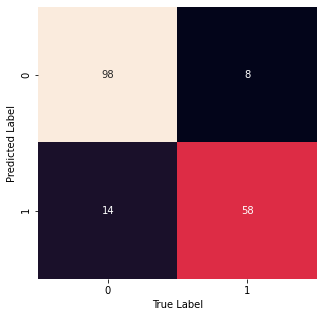

In [1216]:
# Plotting confusion matrix
def plot_conf_matrix(y_test,y_preds):
    '''
    Plot's a nice looking confusion matrix using Seaborn's heatmap()
    '''
    fig,ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot = True,
                    cbar= False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')

plot_conf_matrix(y_test=y_test,y_preds=y_preds)    

In [1221]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       106
           1       0.88      0.81      0.84        72

    accuracy                           0.88       178
   macro avg       0.88      0.87      0.87       178
weighted avg       0.88      0.88      0.88       178



 Saving and Loading our **RandomForestClassifier()** model:

In [1222]:
import pickle

pickle.dump(rs_rf,open('random_forest_classifier_kaggle_titanic.pk1','wb'))

In [1223]:
loaded_model = pickle.load(open('random_forest_classifier_kaggle_titanic.pk1','rb'))
loaded_model.score(X_test,y_test)

0.8764044943820225

> Now we have to put our predictions in a dataframe as asked by kaggle

In [1225]:
predictions = loaded_model.predict(test)
len(predictions)

418

In [1226]:
# Sample submission file
gender_submission.head()   

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [1227]:
Submission = pd.DataFrame()

In [1228]:
Submission['PassengerId'] = test['PassengerId']
Submission['Survived'] = predictions
Submission


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [1233]:
Submission.dtypes

PassengerId    int64
Survived       int64
dtype: object

In [1231]:
# Checking length:
if len(gender_submission) == len(Submission):
    print('Go ahead,covert your data into csv and submit your response!')
    
else:
    print('Check data again :( , lengths not matched as required by kaggle )')

Go ahead,covert your data into csv and submit your response!


In [1234]:
## Convert Sumbission file to csv
Submission.to_csv('Random_Forest_titanic_submission',index=False)

In [1236]:
# Checking the submission file:
loaded_submission_file = pd.read_csv('Random_Forest_titanic_submission')
loaded_submission_file

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## Submitting our Submission file